# Introduction to Genotype-Phenotype Map Module

This notebook a brief introduction to how the genotype-phenotype map module works. 

External imports for plotting and other utilities 

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

Imports from `gpm` module.

In [2]:
from seqspace.utils import encode_mutations, construct_genotypes, DNA

Let's define and arbitrary space. Everything in the cell below will typically be given to you by the experimental data.

In [3]:
# Wildtype sequence
wt = "AAAAAAAA"

# Micro-managing here, stating explicitly what substitutions are possible at each site.
# See documentation for more detail.
mutations = {
    0:DNA,
    1:DNA,
    2:["A","T"]
}

# Generate encoding dictionary for each mutation
encoding = encode_mutations(wt, mutations)

# Construct genotypes from every possible combination of the substitutions above.
genotypes, binary = construct_genotypes(encoding)
print(genotypes)

# Generate random phenotype values
phenotypes = np.random.rand(len(genotypes))

['AAA' 'CAA' 'GAA' 'TAA' 'ACA' 'CCA' 'GCA' 'TCA' 'AGA' 'CGA' 'GGA' 'TGA'
 'ATA' 'CTA' 'GTA' 'TTA' 'AAT' 'CAT' 'GAT' 'TAT' 'ACT' 'CCT' 'GCT' 'TCT'
 'AGT' 'CGT' 'GGT' 'TGT' 'ATT' 'CTT' 'GTT' 'TTT']


## Creating a Genotype-phenotype map instance

Create an instance of the GenoPhenoMap object, passing in the wildtype sequence, genotypes and their phenotypes, and the substitution map. 

In [4]:
from seqspace.gpm import GenoPhenoMap

In [5]:
gpm = GenoPhenoMap(wt, # wildtype sequence
                   genotypes, # genotypes
                   phenotypes, # phenotypes
                   errors=None, # errors in measured phenotypes
                   log_transform=False, # Should the map log_transform the space?
                   mutations=mutations # Substitution map to alphabet 
)

## Construct NetworkX graph from GenoPhenoMap

`GenoPhenoMap` objects have an internal command to port to a NetworkX Graph object.

In [6]:
from networkx import draw, spring_layout

Automatically construct a graph using internal `gpm` method, `build_graph`.

In [7]:
gpm.build_graph()

Notice, `gpm` gains a new attribute, `Graph`, containing a full NetworkX object which contains all the properties of a normal NetworkX DiGraph.

In [8]:
gpm.Graph

Attributes from the mapping objects are added to the network object when graph is constructed.

In [9]:
print(gpm.Graph.node["AGT"])
print(gpm.Graph.edge["AGT"]["AGA"])

{'phenotype': 0.70958133401229118, 'errors': None, 'binary': '0000101'}
{'mutation': 'T2A'}


Draw a graph object following standing NetworkX procedure. 

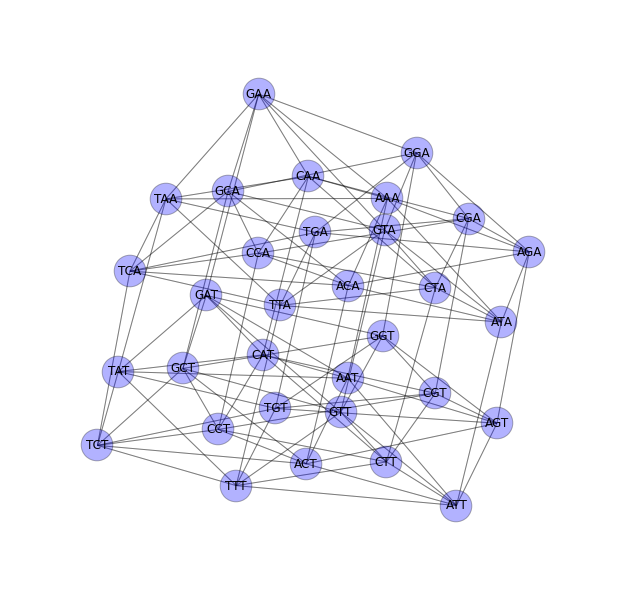

In [10]:
plt.figure(figsize=[8,8])

draw(gpm.Graph,
    with_labels=True, # add sequence labels
    node_color='b',   # color nodes blue
    pos=spring_layout(gpm.Graph), # spring loaded layout of nodes
    node_size=1000, # make node sizes bigger from default
    arrows=False,   # remove arrows from DiGraph
    alpha = 0.3     # lighten opacity of nodes
)